In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [3]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/Vela X-1.txt")

Vela X-1
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,Vela X-1,1600995961 & 1601168939 & 1602387062,L,59119.0,0.0625,NaN,Unclear,0.096,0.040287,0.04,NaN,NaN,False


In [5]:
xray_df.head()

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,Vela X-1,00033047059 & 00033047060 & 00033047061 & 0003...,59119.43,0.0364,NaN,Unclear,2.300000e-09,3.047950e-10,3.047950e-10,tbabs*cflux*(bbody+comptt),cstat,False


# Light Curves

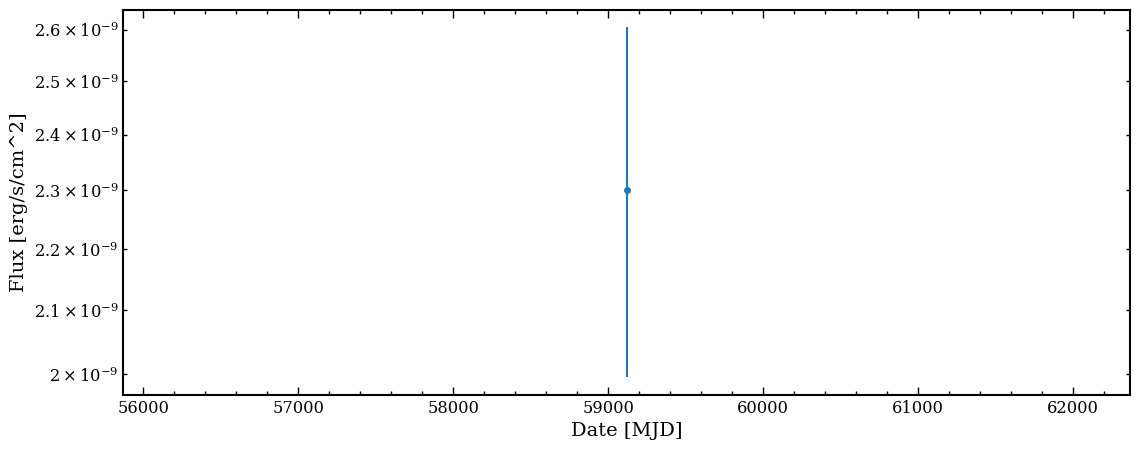

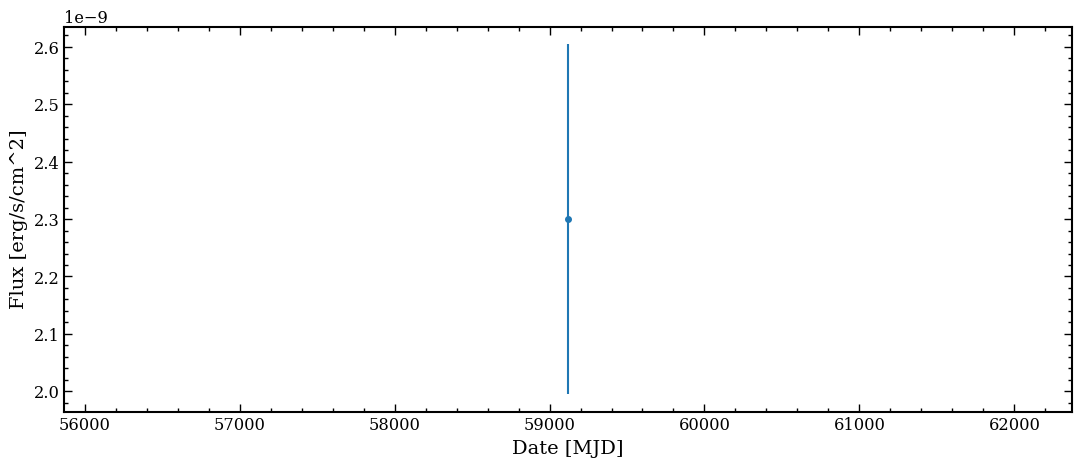

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

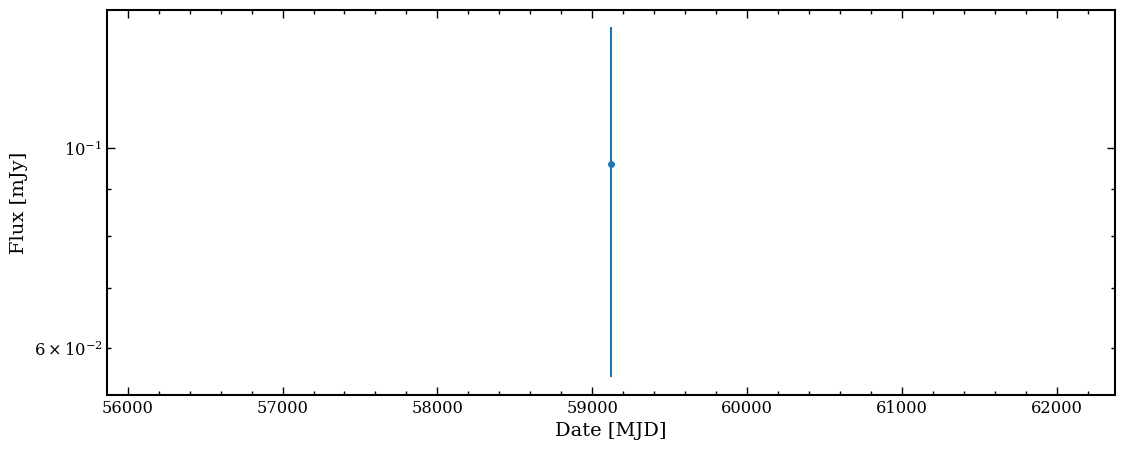

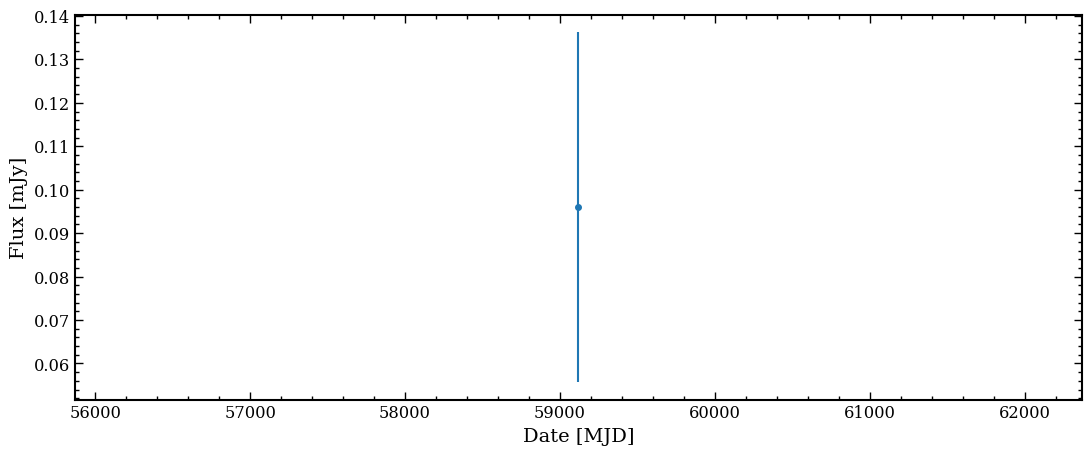

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59119.000000000     0.09600             0.04029             1         2.30000e-09                   3.04795e-10                   3.04795e-10                   False          False          Unclear        
Converting to luminosity using d_kpc = 1.99


In [11]:
paired_data.head()

,name,t,t_diff,Fr,Fr_unc,Fr_uplim_bool,Fx,Fx_unc_l,Fx_unc_u,Fx_uplim_bool,state,class,D,D_prob,Lr,Lr_unc,Lx,Lx_unc_l,Lx_unc_u
0,Vela X-1,59119.0,0.43,0.096,0.040287,False,2.300000e-09,3.047950e-10,3.047950e-10,False,Unclear,NS HMXRB,1.99,"(""gauss"",1.99, 0.13)",5.823567e+26,2.443894e+26,1.090023e+36,1.444494e+35,1.444494e+35


In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

c:\Users\justi\OneDrive\Desktop\OXFORD_PROJECT\FINAL_LR_LX_PLANE_ANALYSIS\lrlx_paper_venv\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


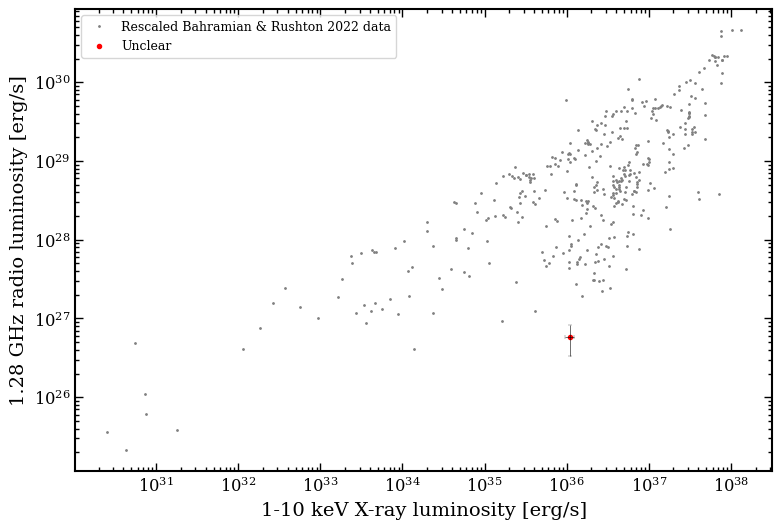

In [13]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

In [14]:
paired_data[["Lx", "Lr"]]

,Lx,Lr
0,1.090023e+36,5.823567e+26
